In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
np.random.uniform()

0.2215631645755466

In [93]:
spot_terminations=[.4, .2, .9]
gap = .1
checkpoints = [.33, .66]

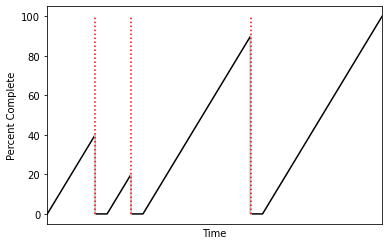

In [94]:
total_runtime = 0
x_vals = []
y_vals = []
for spot_term in spot_terminations:
    x_vals.extend([total_runtime,total_runtime+spot_term,total_runtime+spot_term])
    y_vals.extend([0, 100*spot_term, 0])
    total_runtime += spot_term+gap
x_vals.extend([total_runtime,total_runtime+1])
y_vals.extend([0,100])
plt.plot(x_vals, y_vals, c='black')
total_runtime = 0
for spot_term in spot_terminations:
    plt.plot([total_runtime+spot_term, total_runtime+spot_term], [0,100], c='white')
    plt.plot([total_runtime+spot_term, total_runtime+spot_term], [0,100], c='red', linestyle='dotted')
    total_runtime += spot_term+gap
plt.xticks([])
xrange = [0,total_runtime+1]
plt.xlim(xrange)
plt.xlabel('Time')
plt.ylabel('Percent Complete')
plt.show()

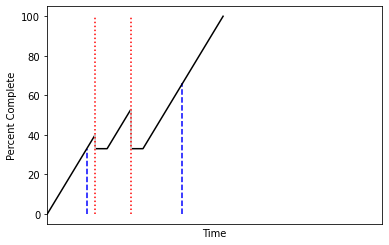

In [95]:
total_runtime = 0
progress = 0
x_vals = []
y_vals = []
for spot_term in spot_terminations:
    if 100*spot_term+progress < 100:
        x_vals.extend([total_runtime,total_runtime+spot_term,total_runtime+spot_term])
        y_vals.extend([progress, 100*spot_term+progress])
        use_progress = 0
        for use_checkpoint in checkpoints:
            if 100*spot_term+progress > use_checkpoint*100:
                if progress < use_checkpoint*100:
                    plt.plot([total_runtime+(use_checkpoint-progress/100.), total_runtime+(use_checkpoint-progress/100.)], [0, use_checkpoint*100.], c='blue', linestyle='dashed')
                use_progress = use_checkpoint*100
            else:
                break
        progress = use_progress
        y_vals.append(progress)
        total_runtime += spot_term+gap
    else:    
        x_vals.extend([total_runtime, total_runtime+(100-progress)/100])
        y_vals.extend([progress, 100])
        for use_checkpoint in checkpoints:
            if progress < use_checkpoint*100:
                plt.plot([total_runtime+(use_checkpoint-progress/100.), total_runtime+(use_checkpoint-progress/100.)], [0, use_checkpoint*100.], c='blue', linestyle='dashed')

plt.plot(x_vals, y_vals, c='black')
total_runtime = 0
for spot_term in spot_terminations[:-1]:
    plt.plot([total_runtime+spot_term, total_runtime+spot_term], [0,100], c='white')
    plt.plot([total_runtime+spot_term, total_runtime+spot_term], [0,100], c='red', linestyle='dotted')
    total_runtime += spot_term+gap
plt.xticks([])
plt.xlim(xrange)
plt.xlabel('Time')
plt.ylabel('Percent Complete')
plt.show()